In [0]:
import os
from Audio_reader import readtf
from getman import getmanlist
import gc
import numpy as np
import pandas as pd
import pickle
from keras.layers import Dense, Input, Dropout,Flatten,MaxPooling1D,SpatialDropout2D
from keras.layers import Conv1D, MaxPooling2D,BatchNormalization,Conv2D
from keras.models import Model
from keras.models import Sequential
from keras import optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import regularizers
from sklearn.metrics import confusion_matrix

In [0]:
def check(y):
    if 74 in y:
        return 0 
    #male
    if 1 in y:
        return 1
    #female
    if 2 in y:
        return 2
    #child
    if 3 in y:
        return 3
    return 0

In [0]:
X = []
Y = [] 
with open("X_list_eval.pickle","rb") as xf:
    X.extend(pickle.load(xf))
with open("Y_list_eval.pickle","rb") as xf:
    Y.extend(pickle.load(xf))
      
with open("X_list.pickle","rb") as xf:
    X.extend(pickle.load(xf))
with open("Y_list.pickle","rb") as xf:
    Y.extend(pickle.load(xf))

X=np.array(X)
Y=np.array(Y)  

X = X.astype('float32')    
X /= 255



In [0]:
learning_rate=0.001
#decay=0.000001
momentum=0.99
dropout_rate = 0.3

rglrzr = regularizers.l2(0.0015)

In [18]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same',activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(rate=dropout_rate))

model.add(Conv2D(128, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(SpatialDropout2D(rate=dropout_rate))



model.add(Conv2D(256, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(256, (1, 1), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(rate=dropout_rate))


model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(512, (1, 1), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(SpatialDropout2D(rate=dropout_rate))



model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(512, (1, 1), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(SpatialDropout2D(rate=dropout_rate))




model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 10, 128, 64)       640       
_________________________________________________________________
batch_normalization_27 (Batc (None, 10, 128, 64)       256       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 128, 64)       36928     
_________________________________________________________________
batch_normalization_28 (Batc (None, 10, 128, 64)       256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 64, 64)         0         
_________________________________________________________________
spatial_dropout2d_11 (Spatia (None, 5, 64, 64)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 5, 64, 128)        73856     
__________

In [0]:

optimizer = optimizers.SGD(lr=learning_rate,momentum=momentum)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

In [0]:
cb=[]

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=0, mode='auto')
early_stopping = EarlyStopping(monitor='acc', min_delta=0, patience=30, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

cb.append(reduce_lr)
cb.append(early_stopping)

In [20]:
history=model.fit(X, Y,
          batch_size=32,
          epochs=200,
          verbose=2,
          callbacks=cb,
          validation_split=0.2,
          shuffle=True)

Train on 506 samples, validate on 127 samples
Epoch 1/200
 - 5s - loss: 1.5123 - acc: 0.4545 - val_loss: 7.7418 - val_acc: 0.5197
Epoch 2/200
 - 2s - loss: 1.2027 - acc: 0.5257 - val_loss: 7.7418 - val_acc: 0.5197
Epoch 3/200
 - 2s - loss: 1.0180 - acc: 0.5474 - val_loss: 12.3108 - val_acc: 0.2362
Epoch 4/200
 - 2s - loss: 0.9700 - acc: 0.5909 - val_loss: 7.7420 - val_acc: 0.5197
Epoch 5/200
 - 2s - loss: 0.9039 - acc: 0.6107 - val_loss: 12.3109 - val_acc: 0.2362
Epoch 6/200
 - 2s - loss: 0.8569 - acc: 0.6364 - val_loss: 7.7421 - val_acc: 0.5197
Epoch 7/200
 - 2s - loss: 0.8358 - acc: 0.6285 - val_loss: 12.3111 - val_acc: 0.2362
Epoch 8/200
 - 2s - loss: 0.8139 - acc: 0.6522 - val_loss: 12.3112 - val_acc: 0.2362
Epoch 9/200
 - 2s - loss: 0.8331 - acc: 0.6443 - val_loss: 10.1056 - val_acc: 0.3150
Epoch 10/200
 - 2s - loss: 0.7894 - acc: 0.6482 - val_loss: 12.3113 - val_acc: 0.2362
Epoch 11/200
 - 2s - loss: 0.7681 - acc: 0.6700 - val_loss: 6.5251 - val_acc: 0.3622
Epoch 12/200
 - 2s - l

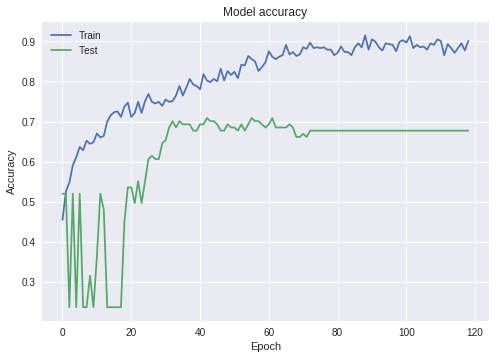

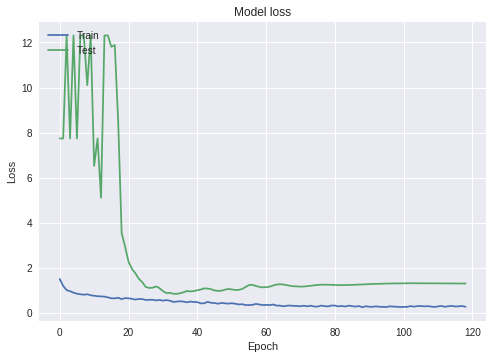

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(X)
def maxpos(li):
      if (li[1]>li[0]) and (li[1]>li[2])  :
        return 1
      if (li[2]>li[0]) and (li[2]>li[1])  :
        return 2     
      return 0
y_pre=[maxpos(y) for y in y_pred]
y_tes=[maxpos(y) for y in Y]

In [25]:
confusion_matrix(y_true=y_tes,y_pred=y_pre)

array([[105,   4,  16],
       [  5, 115,  16],
       [  8,  11, 353]])

In [0]:
model.save('VGG-ish_73.model')